# 2.10 Perceptron Trick

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
def x2(x1, w1, w2, b):
    return (-w1 * x1 - b) / w2
x1s = np.linspace(-2, 2, 100)

For the example, how many iterations of this trick would we have to do to make the point (1,1) get classified correctly starting with the line
$3x_1 + 4x_2 -10 = 0$

In [2]:
weights = np.array([3, 4, -10])
points = np.array([1, 1, 1])
def perceptron_trick(weights, points, learning_rate=0.1):
    return weights + learning_rate * points


In [3]:
counter = 0
weights = np.array([3, 4, -10])
original_weights = weights
while (points * weights).sum() < 0:
    weights = perceptron_trick(weights, points)
    counter += 1
print(f"The perceptron trick took {counter - 1} iterations to classify the point correctly")

The perceptron trick took 10 iterations to classify the point correctly


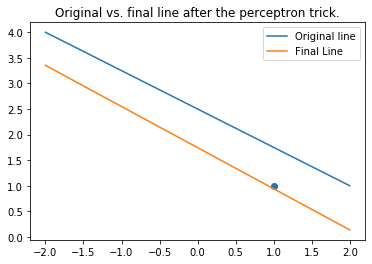

In [4]:
original_x2s = x2(x1s, original_weights[0], original_weights[1], original_weights[2])
final_x2s = x2(x1s, weights[0], weights[1], weights[2])
plt.plot(x1s, original_x2s)
plt.plot(x1s, final_x2s)
plt.scatter(1, 1)
plt.legend(["Original line", "Final Line"])
plt.title("Original vs. final line after the perceptron trick.")
plt.show()

# The Perceptron Algorithm

The perceptron algorithm conceptually will take every incorrectly classified point and move the line closer to that point. Eventually, if the data is linearly seperable, we will be able to classify all of the data correctly.
The mathematical definition of the update is as follows where $W$ are the weights, $X$ is the data, $y_i$ is the label for the data coresponding to $X_i$, and $\hat{y_i}$ is the current prediction for that data.

$$
W = \sum_{i = 1}^{n}{(W + \alpha X_i)(y_i - \hat{y_i})}
$$

Quiz content

In [5]:
def get_data():
    data = np.genfromtxt("./2.1.11.data.csv", delimiter=",")
    assert data.shape == (100, 3)
    return data[:, 0:2], data[:, -1]

In [6]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for X_i, y_i in zip(X, y):
        y_hat = prediction(X_i, W, b)
        W += (learn_rate * X_i.reshape(2, 1)) * (y_i - y_hat)
        b += learn_rate * (y_i - y_hat)
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [7]:
X, y = get_data()

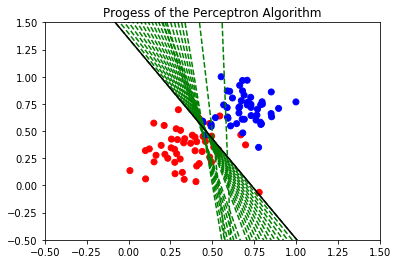

In [8]:
boundary_lines = trainPerceptronAlgorithm(X, y)
for line in boundary_lines:
    slope = line[0]
    y_int = line[1]
    x2s = slope * x1s + y_int
    plt.plot(x1s, x2s, "g--")
# Final line variables will still be in the variable space
plt.plot(x1s, x2s, 'k')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(["blue", "red"]))
plt.xlim([-.5, 1.5])
plt.ylim([-.5, 1.5])
plt.title("Progess of the Perceptron Algorithm")
plt.show()